In [1]:
import numpy as np
import scipy as sp
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas
import nibabel as nib
import sys
sys.path.insert(0,'../deepfly/')
import ft_parser as ft
from scipy.interpolate import interp1d

2021-11-04 20:00:49.831897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-04 20:00:49.831912: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load in the data for a single fly

In [2]:
neural = '/data/minseung/deepfly/fly_087/func_0/brain_zscored_green_high_pass_masked_warped.nii'
data = np.array(nib.load(neural).get_data(), copy=True)

/tmp/ipykernel_3921731/2962041204.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = np.array(nib.load(neural).get_data(), copy=True)


In [5]:
timestamps_path = '/data/minseung/deepfly/supervoxel/non-interpolated/X_all_neural_timestamps_z_t.npy'
X_all_neural_timestamps_z_t = np.load(timestamps_path)

In [104]:
np.diff(behavior_timestamps[0:90000])

array([0.00327333, 0.00237084, 0.0015593 , ..., 0.00287585, 0.00415344,
       0.00554971])

In [96]:
o = np.arange(0,last_tp,531.93560992)

In [107]:
behavior_timestamps.shape[0] / 9

90000.0

## Load in the behavioral data

In [3]:
ft_path = '/data/minseung/deepfly/fly_087/func_0/fictrac/fictrac-20200228_161226.dat'
ft_data = ft.FtDataReader(ft_path)

In [5]:
ft_data.fram_num

array([    0,     1,     2, ..., 89997, 89998, 89999])

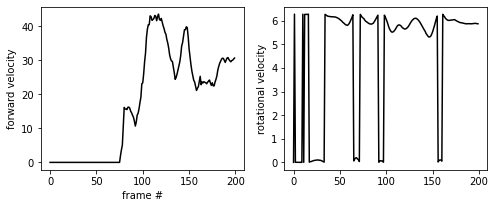

In [31]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(np.maximum(ft_data.y[0:200],0) * 100,c='k')
ax[0].set_xlabel('frame #')
ax[0].set_ylabel('forward velocity')
ax[1].plot(ft_data.theta[0:200],c='k')
ax[1].set_ylabel('rotational velocity')
plt.savefig('./milestone-figs/behavioral_example.pdf')

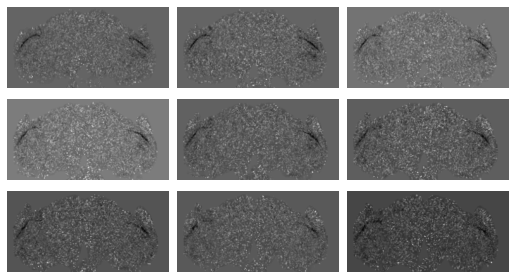

In [29]:
nrow = 3
ncol = 3
fig,ax = plt.subplots(nrow,ncol,figsize=(9,5))
fig.subplots_adjust(hspace=.05,wspace=.05)
i = 0
j = 0
for n in range(data.shape[2]):
    
    if n not in np.arange(18,27): continue
    
    ax[i,j].imshow(np.transpose(data[...,n,0]),cmap='gray')
    ax[i,j].axis('off')
    j += 1
    
    if j == ncol:
        j = 0
        i +=1

plt.savefig('./milestone-figs/2p_example.pdf')
plt.show()

